# Estimating the prices of cars using regression algorithms.
   
   
   
   
   
   
   
   
   
<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="500" height="200">














👉 This study will examine the dataset named as **Auto Scout**  at Kaggle website [external link text](https://www.kaggle.com/datasets/promptcloud/autoscout-automotive-data)

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com) in

2019, contains many features of 9 different car models. The data on this notebook is already preprocessed and prepared for

algorithms.Preprocess included ; Explotary data analysis, handling missing values and handling outliers.


# 1. Data Review

In [ ]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_csv("autoscout_cleaned.csv")

In [ ]:
df.sample()

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kw,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,CO2_Emission
3155,Audi A3,Sedans,14800,89294.0,Used,Diesel,"Air conditioning,Automatic climate control,Pow...",Radio,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,6.0,1.0,110.0,0,Metallic,Cloth,Manual,1968.0,1865.0,front,108.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kw                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [ ]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32013.951316,5.937268,4.088441,0.984914,88.497769,0.247156,1428.657364,1337.675467,117.783110
std,7377.200813,37049.161761,0.704943,1.701856,0.417313,26.666504,0.431372,275.852413,199.672043,18.022786
min,4950.000000,0.000000,5.000000,0.000000,0.000000,51.000000,0.000000,890.000000,840.000000,45.000000
25%,12850.000000,2234.573958,5.000000,3.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,104.000000
50%,16900.000000,20410.000000,6.000000,4.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,117.000000
75%,21900.000000,46900.000000,6.000000,5.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,129.000000
max,74600.000000,317000.000000,8.000000,6.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,253.000000


In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Gears', 'age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'CO2_Emission'],
      dtype='object')

In [ ]:
df2 = df.copy() 

# Feature Engineering

In [ ]:
df.select_dtypes(include ="object").head()   # sadece object sütunları getiriyoruz

,make_model,body_type,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [ ]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())  #number of uniques

make_model          : 8
body_type           : 8
Type                : 5
Fuel                : 3
Comfort_Convenience : 6193
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4439
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [ ]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

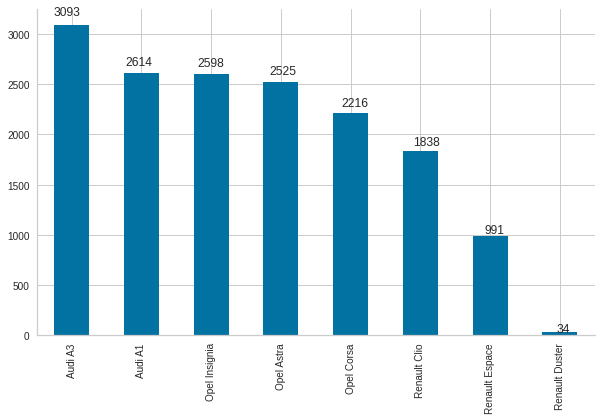

In [ ]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False) # tepe çizgisini kaldırdık
ax.spines['right'].set_visible(False) # sağ çizgiyi kaldırdık
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03)) #üzerlerine ağırlıkları yazdırdık

In [ ]:
df.shape

(15909, 22)

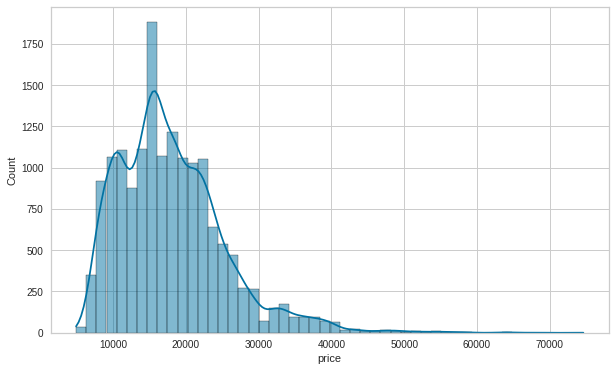

In [ ]:
sns.histplot(df.price, bins=50, kde=True) # price 4000$ üstü verdiğimde,n normal dağılımını bozduğu görülüyor

In [ ]:
skew(df.price) #normal dağılımda skew sıfır olur.

1.2368977644607202

In [ ]:
df_numeric = df.select_dtypes(include ="number") # numeric değerleri aldık
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission
0,15770,56013.000000,7.0,6.0,2.0,66.0,1,1422.0,1220.0,99.0
1,14500,80000.000000,7.0,5.0,1.0,141.0,0,1798.0,1255.0,129.0
2,14640,83450.000000,7.0,6.0,1.0,85.0,0,1598.0,1135.0,99.0
3,14500,73000.000000,6.0,6.0,1.0,66.0,0,1422.0,1195.0,99.0
4,16790,16200.000000,7.0,6.0,1.0,66.0,1,1422.0,1135.0,109.0
...,...,...,...,...,...,...,...,...,...,...
15904,39950,54.341398,6.0,0.0,1.0,147.0,0,1997.0,1758.0,139.0
15905,39885,9900.000000,7.0,3.0,1.0,165.0,0,1798.0,1708.0,168.0
15906,39875,15.000000,6.0,3.0,1.0,146.0,1,1997.0,1734.0,139.0
15907,39700,10.000000,6.0,3.0,1.0,147.0,0,1997.0,1758.0,139.0


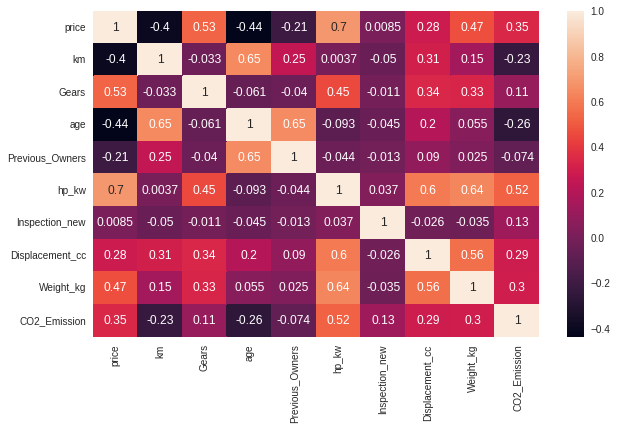

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [ ]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()

price              False
km                 False
Gears              False
age                False
Previous_Owners    False
hp_kw              False
Inspection_new     False
Displacement_cc    False
Weight_kg          False
CO2_Emission       False
dtype: bool

In [ ]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any() #ikinci any yukardaki seri içinde de tarıyor.

False

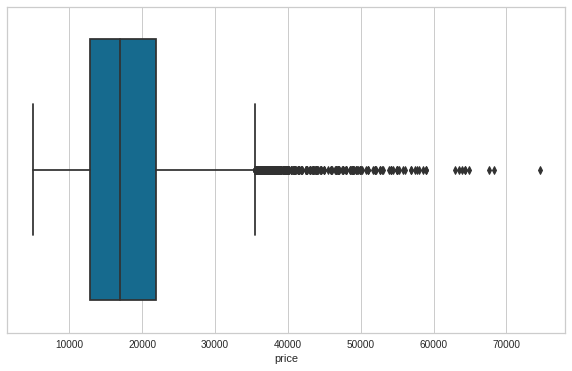

In [ ]:
sns.boxplot(df.price); # 4000$ üstü outlier görünüyor ama araba grupları için ayrı ayrı bakamak daha sağlıklı, bu bilgi verinin tamamı için geçerli.

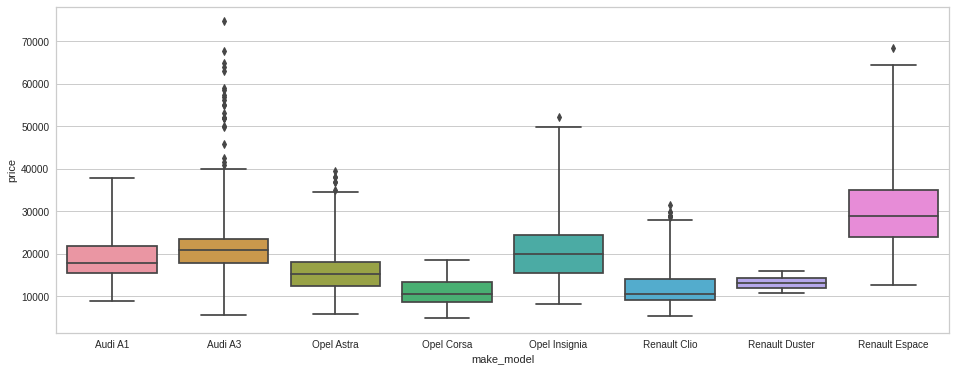

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3) # Audi A3, Opel Astra,Opel Insignia,Renault Clio ve Renault Espace de outlier veri görünüyor diğerlerinde yok 
plt.show()

## Get dummies 

In [ ]:
df[["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"]].head(3)

,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security
0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."


In [ ]:
#Belirttiğim sütunlardaki verileri virgülle ayırıp, get dummies yapıp  sütunların başınada kısaltmalarını yazıyor ve df e ekliyorum.
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_")) 
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first =True)

In [ ]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,6.0,2.0,66.0,1,1422.0,1220.0,99.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,5.0,1.0,141.0,0,1798.0,1255.0,129.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,6.0,1.0,85.0,0,1598.0,1135.0,99.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,6.0,1.0,66.0,0,1422.0,1195.0,99.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,6.0,1.0,66.0,1,1422.0,1135.0,109.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,

In [ ]:
df.shape

(15909, 131)

In [ ]:
df.isnull().any().any()

False

In [ ]:
corr_by_price = df.corr()["price"].sort_values()
corr_by_price

age                                        -0.438074
Gearing_Type_Manual                        -0.431701
km                                         -0.400380
make_model_Opel Corsa                      -0.379461
Type_Used                                  -0.366908
make_model_Renault Clio                    -0.297780
Previous_Owners                            -0.206431
Drive_chain_front                          -0.155907
make_model_Opel Astra                      -0.128321
em_CD player                               -0.093459
em_On-board computer                       -0.077341
ss_Central door lock with remote control   -0.070370
ss_Fog lights                              -0.053421
Paint_Type_Perl effect                     -0.049903
ss_Isofix                                  -0.045871
body_type_Sedans                           -0.044644
ss_Central door lock                       -0.043982
ss_Power steering                          -0.041659
ss_Head airbag                             -0.

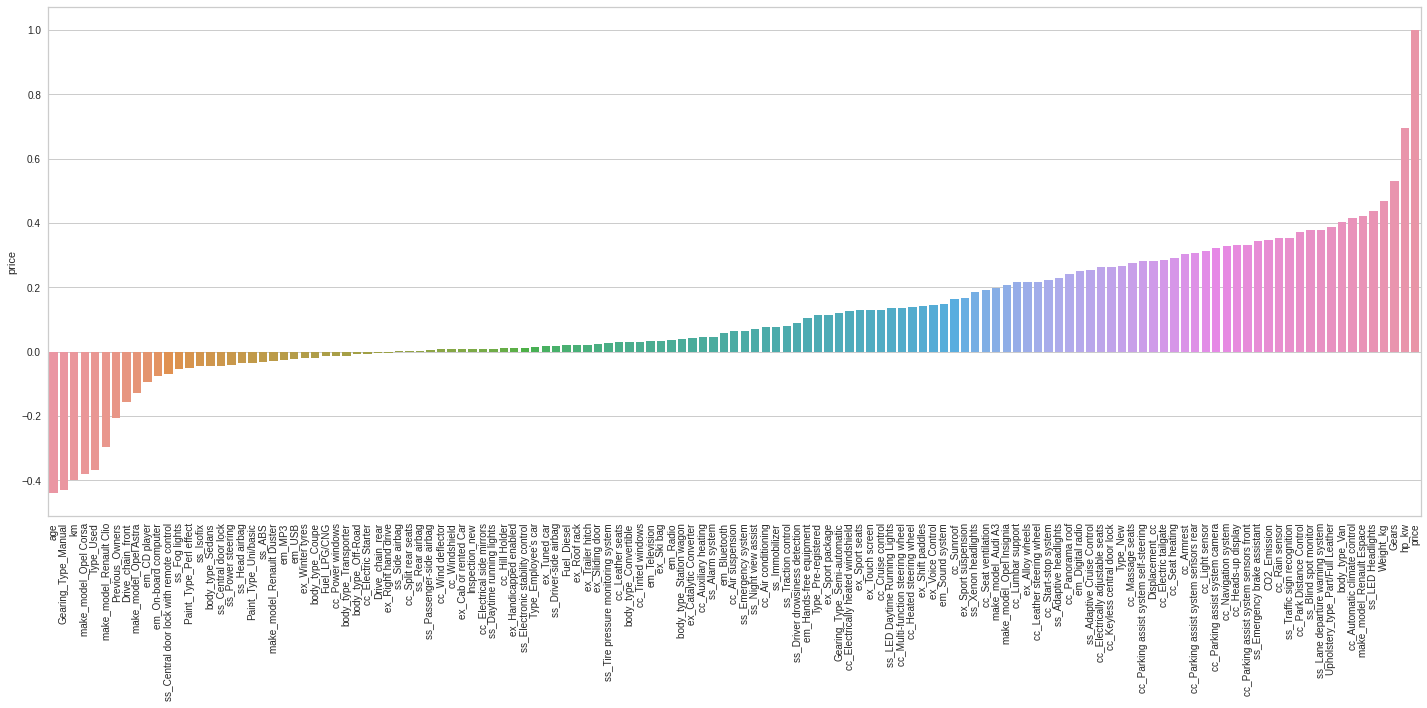

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# 2. Modelling

In [ ]:
x= df.drop(columns="price")
y= df.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    #from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    for item in algos:
        item.fit(x_train,y_train)
        pred = item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
    
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
   

    return result.sort_values('R_Squared',ascending=False)

In [ ]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.928359,1993.799290,1312.609897
ExtraTreeRegressor,0.925113,2038.460252,1102.501845
Lasso,0.882134,2557.379603,1734.650590
Ridge,0.882002,2558.805581,1734.731251
LinearRegression,0.881852,2560.431080,1735.418293
ElasticNet,0.806202,3279.254851,2359.558860
KNeighborsRegressor,0.685296,4178.798035,2880.256317


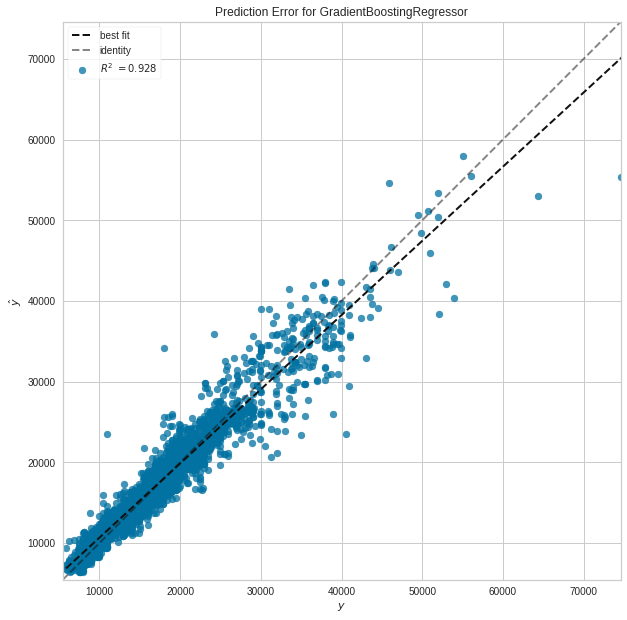

In [ ]:
# actual eğri ile predict eğrisi arasındaki açıklık bariz,
# bunu özellikle 30000 sonrası verilerden görüyoruz,bu veriler predict eğrisini uzaklaştırıyor gerçek verilerden
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from sklearn.ensemble import GradientBoostingRegressor
visualizer = RadViz(size=(720, 3000))
model = GradientBoostingRegressor()

visualizer = PredictionError(model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show();

Bu grafikte modelin hata sapmasını etkileyen aralık bariz görünüyor.Bu kısmı çıkartabilir ve modeli belli bır fiyat aralığında özelleştirmek bir yöntem.Bu ayrışan kısımlara benzer karakter gösteren data eklemek başka bir yöntem.Modelim %92.8 oranında veriyi doğrulayabiliyor.

## Feature İmportance

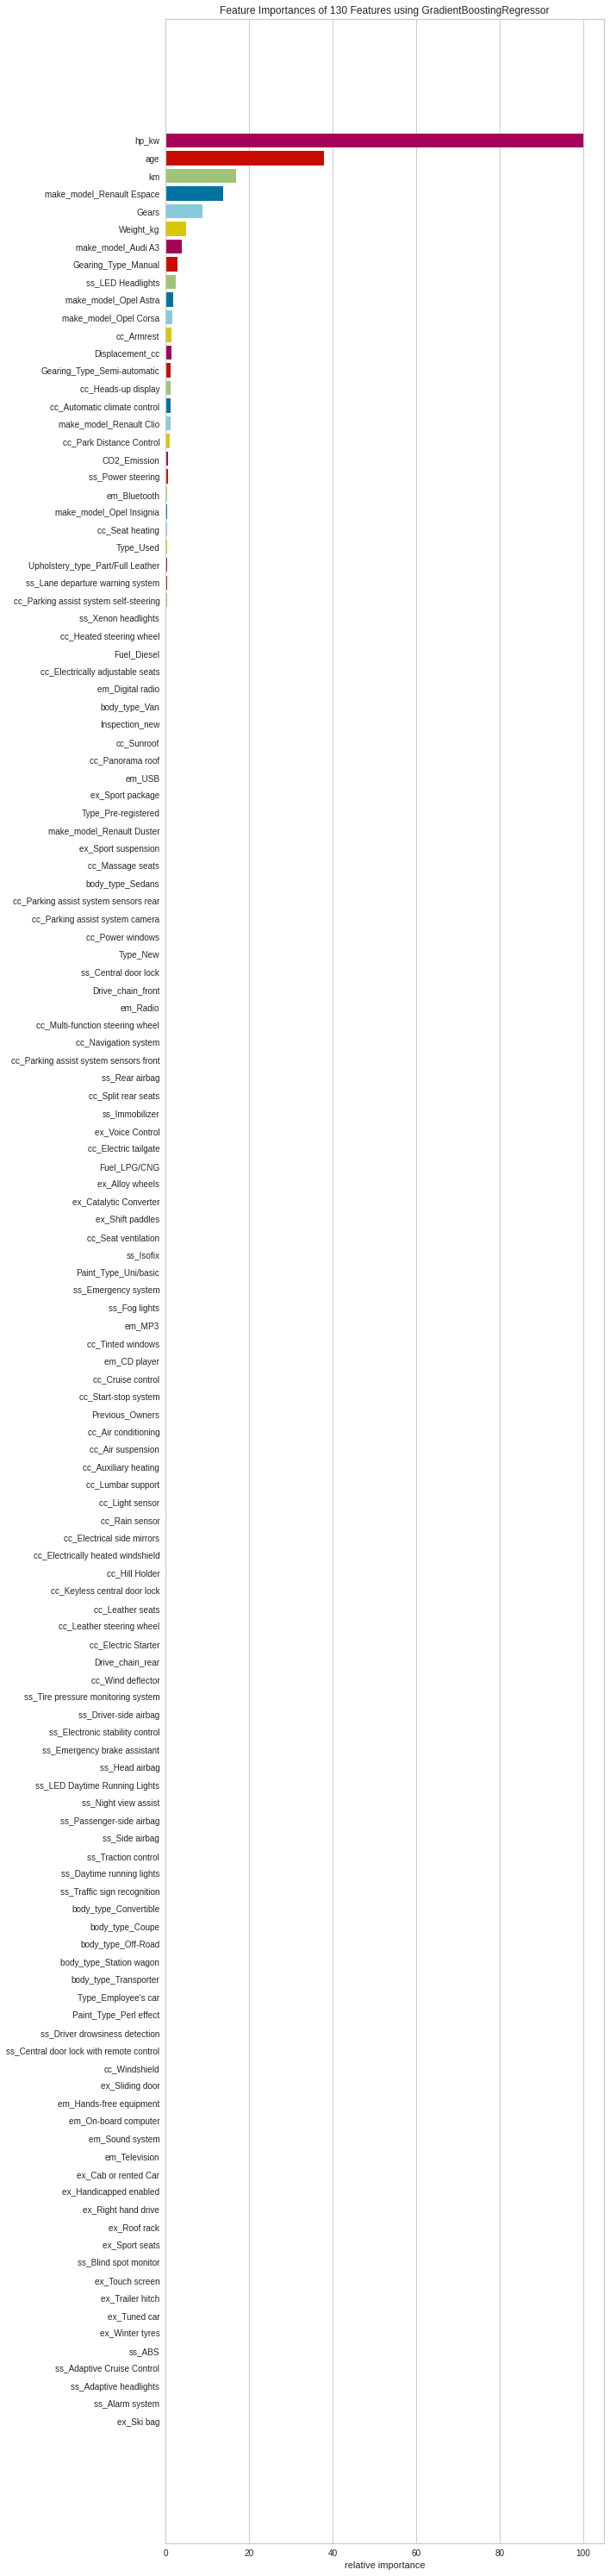

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(model, labels=x_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(x_train, y_train)
viz.show();

## Prediction new observation

In [ ]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [ ]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [ ]:
x.head(1)

,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,56013.0,7.0,6.0,2.0,66.0,1,1422.0,1220.0,99.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
my_dict = pd.get_dummies(my_dict)  #numeric dönüşüm ve sütun sayısı ve isimlerini aynı yapmak hedefim.
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [ ]:
my_dict = my_dict.reindex(columns = x.columns, fill_value=0) # yeni sunacağım veriyi modeldeki sütun düzenine göre ayarlıyorum.
my_dict

,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,17000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.head(1)

,km,Gears,age,Previous_Owners,hp_kw,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,56013.0,7.0,6.0,2.0,66.0,1,1422.0,1220.0,99.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
final_model = GradientBoostingRegressor()
final_model.fit(x,y)

GradientBoostingRegressor()

In [ ]:
final_model.predict(my_dict) # bu verilere sahip araba 16117$ eder

array([16117.05310707])